# Homework 5

Estimate the distribution of log luminance levels in the Ruderman natural image dataset. For each image, transform it by taking the log
of the pixel luminance values, and subtracting the mean value of log luminance across each image. Show the estimate of the error bars on this distribution of mean-subtracted log-luminances, $y$, by thinking about what “independent samples” are in this dataset (you do not need to do a full bootstrap analysis). Show that the left and right tails of this distribution are approximately exponential, i.e., $$P_+ (y) \propto exp(-\mu_+ |y|)$$
and
$$P_-(y) \propto exp(-\mu_-|y|)$$

where P ± stand for the positive (or, respectively, the negative) tails of the log-luminance distribution. Do this by finding the two best-fitting constants, μ + and μ and plotting the tails on top of the normalized distribution for y. A good choice to define the positive and negative tails is to use the threshold of |y| > 1. How you do the fitting (linear regression in log-luminance space, 2 fitting of raw histograms) is up to you, but explain clearly what you did.

estimate the pdf on each image: error is std on ??.
same binning is crucial!

In [245]:
import numpy as np
import glob
import matplotlib.pyplot as plt

### Import the data

In [246]:
# Prepare the filenames using glob
fnames = glob.glob('ruderman/image_*.txt')
# dim = np.loadtxt('ruderman/image_1.txt').shape[0]

# Create a dictionary for the data
ruderman = {}

# Import each image into our dictionary
for file in range(len(fnames)):
    fname = fnames[file]
    image = np.loadtxt(fname) # import image
    ruderman[f'image_{file}'] = image

### Visualize an image as a sanity check

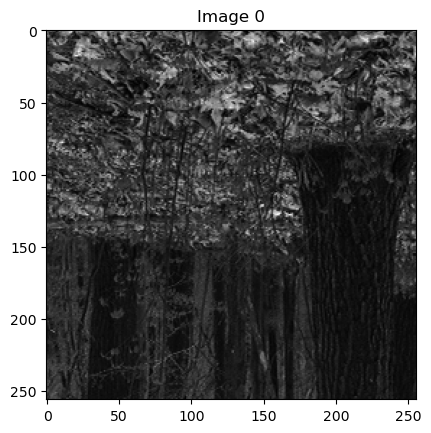

In [247]:
image_idx = 0
plt.imshow(ruderman[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')
plt.show()

## For each image, transform it by taking the log of the pixel luminance values, and subtracting the mean value of log luminance across each image.

In [248]:
ruderman_transformed = {}

for image in range(len(ruderman)):
    img_transformed = np.log(ruderman[f'image_{image}'])
    ruderman_transformed[f'image_{image}'] = img_transformed

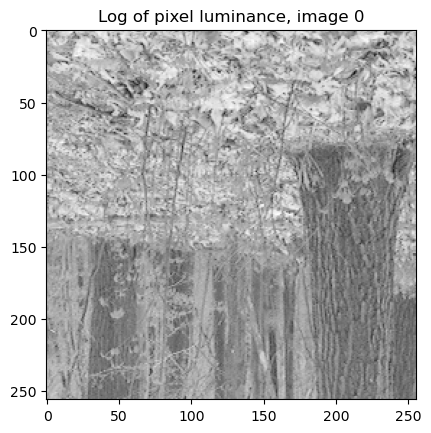

In [249]:
image_idx = 0
plt.imshow(ruderman_transformed[f'image_{image_idx}'], cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')
plt.show()

### Find the mean log luminance value

In [250]:
# First calculate the mean log luminance for each image
mean_log_luminances = np.zeros(len(ruderman_transformed))
for image in range(len(ruderman_transformed)):
    mean_log_luminances[image] = np.mean(ruderman_transformed[f'image_{image}'])

# Now calculate the mean luminance across all images
mean_log_luminance = np.mean(mean_log_luminances)

### Subtract the mean log luminance value from each image

In [251]:
ruderman_mean_subtracted = {}

print(mean_log_luminance)

print(ruderman['image_0'][0][:10])

for image in range(len(ruderman_transformed)):
    img_mean_subtracted = ruderman[f'image_{image}'] - mean_log_luminance
    ruderman_mean_subtracted[f'image_{image}'] = img_mean_subtracted
    
print(ruderman_mean_subtracted['image_0'][0][:10])

-2.9842701664368985
[0.0560804 0.036769  0.0803213 0.121278  0.0678687 0.0395671 0.0854505
 0.0746815 0.0705291 0.0744164]
[3.04035057 3.02103917 3.06459146 3.10554817 3.05213887 3.02383727
 3.06972067 3.05895166 3.05479927 3.05868657]


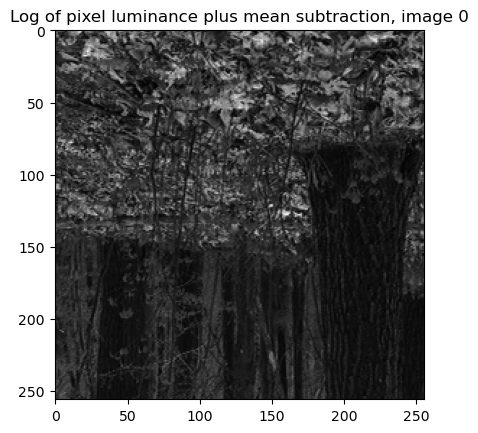

In [252]:
image_idx = 0
plt.imshow(ruderman_mean_subtracted[f'image_{image_idx}'], cmap='gray')
plt.title(f'Log of pixel luminance plus mean subtraction, image {image_idx}')
plt.show()

## Show the estimate of the error bars on this distribution of mean-subtracted log-luminances, $y$, by thinking about what “independent samples” are in this dataset (you do not need to do a full bootstrap analysis).

In [253]:
def flatten_images(data):
    flattened = np.zeros((len(ruderman), dim*dim))
    for image in range(len(data)):
        fname = f'image_{image}'
        img = data[fname]
        flattened[image] = img.flatten()
    return flattened

flattened_images = flatten_images(ruderman)
print(flattened_images.shape)

(45, 65536)


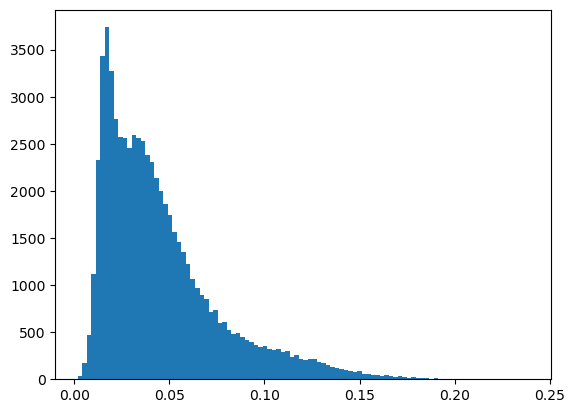

In [254]:
# Plot the luminance distribution of a single image
plt.hist(flattened_images[0], bins=100)
plt.show()

In [241]:
# Group all the log luminances
flattened_full_dataset = flattened_images.flatten()

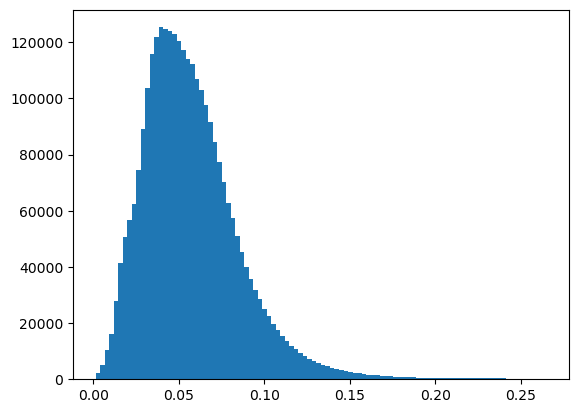

In [242]:
# Plot the luminance distribution of all images
plt.hist(flattened_full_dataset, bins=100)
plt.show()

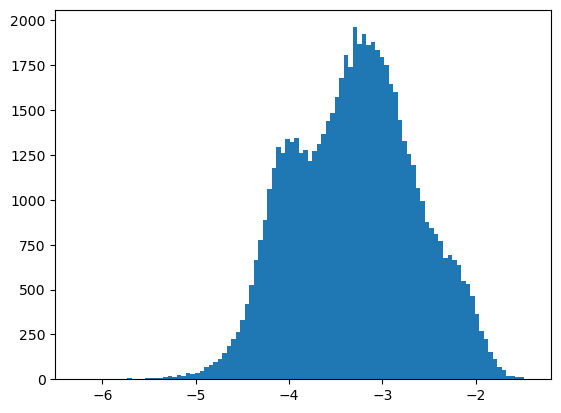

In [243]:
# Flatten log luminance images and plot their distribution
flattened_log_images = flatten_images(ruderman_transformed)
plt.hist(flattened_log_images[0], bins=100)
plt.show()

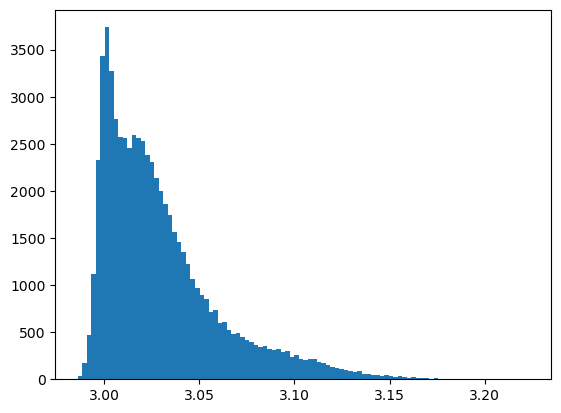

In [257]:
# Plot mean-subtracted log luminance
flattened_mean_subtracted = flatten_images(ruderman_mean_subtracted)

# flattened_mean_subtracted = np.log(flattened_full_dataset - mean_log_luminance)

plt.hist(flattened_mean_subtracted[0], bins=100)
plt.show()

## Show that the left and right tails of this distribution are approximately exponential, i.e., $P_+ (y) \propto exp(-\mu_+ |y|)$ and $P_-(y) \propto exp(-\mu_-|y|)$ where P ± stand for the positive (or, respectively, the negative) tails of the log-luminance distribution. Do this by finding the two best-fitting constants, μ + and μ and plotting the tails on top of the normalized distribution for y. A good choice to define the positive and negative tails is to use the threshold of |y| > 1. How you do the fitting (linear regression in log-luminance space, 2 fitting of raw histograms) is up to you, but explain clearly what you did.